In [1]:
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# CBF5 Violin Plots

In [2]:
file = open('cbf5.json')
fileDict = json.load(file)

In [3]:
rows = []
keys = fileDict.keys()
print(keys)
for condition in fileDict.keys():
    all_rhos = fileDict[condition]['all_rhos']
    all_stds = fileDict[condition]['all_stds']
    all_cbf5_areas = fileDict[condition]['all_cbf5_areas']
    for idx, rho in enumerate(all_rhos):
        if condition == 'wt':
            label = 0
        elif condition == 'gal':
            label = 1
        elif condition == 'glu':
            label = 2
        row = {'rho': rho, 'std': all_stds[idx], 'area': all_cbf5_areas[idx], 'condition': label}
        rows.append(row)
df = pd.DataFrame(rows)
df.sort_values(['condition'], ascending=True, inplace=True)

dict_keys(['gal', 'glu', 'wt'])


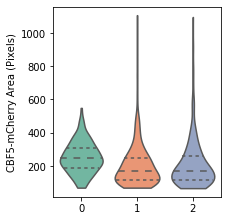

In [7]:
ax = sns.violinplot(x='condition', y='area', data=df, inner='quartile', cut=0, palette='Set2')
ax.set(ylabel='CBF5-mCherry Area (Pixels)', xlabel='')
fig = ax.get_figure()
fig.set_size_inches(3, 3.5)
fig.savefig('cbf5_areas.png', bbox_inches='tight', dpi = 2000)

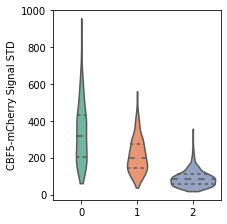

In [8]:
ax = sns.violinplot(x='condition', y='std', data=df, inner='quartile', cut=0, palette='Set2')
ax.set(ylabel='CBF5-mCherry Signal STD', xlabel='')
fig = ax.get_figure()
fig.set_size_inches(3, 3.5)
fig.savefig('cbf5_signal_stds.png', bbox_inches='tight', dpi = 2000)

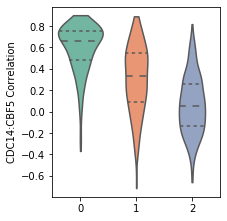

In [9]:
ax = sns.violinplot(x='condition', y='rho', data=df, inner='quartile', cut=0, palette='Set2')
ax.set(ylabel='CDC14:CBF5 Correlation', xlabel='')
fig = ax.get_figure()
fig.set_size_inches(3, 3.5)
fig.savefig('cbf5_cdc14_correlation.png', bbox_inches='tight', dpi = 2000)